**About [FRED](https://fred.stlouisfed.org/)**
> [FRED](https://fred.stlouisfed.org/) is short for Federal Reserve Data and it is an online database consisting of hundred of thousands of economic data time series from scores of national, international, public, and private sources. FRED, created and maintained by the Research Department at the Federal Reserve Bank of St. Louis, goes far beyond simply providing data: It combines data with a powerful mix of tools that help the user understand, interact with, display, and disseminate the data. In essence, FRED helps users tell their data stories. 

1. Download and plot 3 apparently related sets of data. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function. For example, you might plot the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at <a href="https://fred.stlouisfed.org/">FRED</a> and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.

In [1]:
# importing python modules we'll use for this project
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.transforms as mtransforms

# seaborn will be used to plot heatmaps
import seaborn as sn

# PdfPages will be used to save multiple plots on the same pdf file
from matplotlib.backends.backend_pdf import FigureCanvasPdf, PdfPages

#from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# scatter plot function
def plot_ts_scatter(df, s = 75, figsize = (40, 20), title = False, save_fig = False, pp=None):
        
# Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    
# cycle through each variable for x value
    for x in plot_vars:
        
# cycle again for y-value
        for y in plot_vars:
        
# check to make sure x variable does not equal y variable            
            if x != y:
        
# we'll use that default figsice in the subplot                
                fig, ax = plt.subplots(figsize = figsize)
    
# Create list of years from index Year will be represented by color
# we'll create the year value in the df, years will be the c value
                if "Year" not in df.keys():
        
# create list from index, convert each index value to string
# only include first 4 characters which is the year create an integer from those characters                 
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
    
# assign x & y values, s stands for size of points which we already defined in the function parameter
# c represents color so we want to use the year column to color the data                 
                df.plot.scatter(x = x, y = y, s = s, ax = ax, 
                                c = "Year", cmap = "viridis") #cmap deals with colormaps in matplotlib
                
# Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                
# Get rid of tick lines perpendicular to both axis for aesthetic
# by setting the length of the tickmarks to zero
                ax.tick_params('both', length=0, which='both')
                
# save image if PdfPages object was passed then try to create a new folder
# if the folder doesn't exist, create it. If it exists, save the fig
                if save_fig:
                    try:                       
                        os.mkdir("plots")
                    except:
                        pass
                    
# identify directory to save figure and save the plots folder then name the file. 
# The first 12 chars of the first var, first 12 chars of the second var, identify the color
# save as .png as well as pdf
                    directory = "plots/" + x[:12] + " " + y[:12] + "c=Year"                  
                    plt.savefig(directory.replace(":", "-") + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")
                
                

# function for line plots                        
def plot_lines(df, title = False, linewidth = 1, figsize = (40, 20), 
               full_index = False, h_line = False, max_y = False,
               legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    
# If no secondary y-axis, plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    
# turn the text on the x-axis so taht it reads vertically
    ax.tick_params(axis ="x", rotation = 90)
    
# get rid of tick lines
    ax.tick_params("both", length=0, which = "both")
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
          
# transform y-axis values from scientific notations to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    
    if title != False:
        plt.title(title, fontsize = 72)
        
    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["5 Y (%)"] < df["1 Y (%)"],
                        facecolor='red', alpha=0.2, transform = trans)      
        
#    vals = [int(x) for x in vals]
#    ax.set_yticklabels(vals)
    
# format image filename by replacing unwanted characters
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename=filename.replace(char, "")
        plt.show()
#Save file and also avoid cutting off text
    plt.savefig(filename[:50] + "line.png", 
                bbox_inches = "tight") #avoids cutting off text

# save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [3]:
# function to gather the necessary data using FRED's API

def gather_data (data_codes, start, end = datetime.datetime.today(), freq = "A"):
# check if new column is first column of data, if true, create a new df    
    i = 0
    
# dct.items() will call key and val then run through each code
# key is column name and val is the code
    for key, code in data_codes.items():
        
# check if it's our first column of data
        if i == 0:
            
# if it's the first column of data, create a new df for the first variable
# resample the data by frequency and take the mean. E.g. if you sampled teh data bi-weekly, you'll the weekly average
# instead of .mean(), you can also use .first(), or .last() to get just the first or last sample.
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
# rename first column so that "code" is replaced by the key or variable name        
            df.rename(columns = {code:key}, inplace = True)
            
# setting i to None will cause the next block of code to execute, placing the data within the df
# instead of creating a new df for each variable. 
# so, if i != 0, just add the next column rather than creating a new df
            i = None
        else:
# if df already exists, add new column            
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    return df

> Let's look at unemployment rates and how it relates to the rate at which people quite their jobs for non-farm related workers. 

In [4]:
# gather data

data_codes = {"Unemployment Rate": "UNRATE",    
              "Quits: Total Nonfarm": "JTSQUR"}

start = datetime.datetime(1940,12,31)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Y").dropna()
data

,Unemployment Rate,Quits: Total Nonfarm
DATE,,
2000-12-31,3.966667,2.200000
2001-12-31,4.741667,2.200000
2002-12-31,5.783333,1.950000
2003-12-31,5.991667,1.825000
2004-12-31,5.541667,1.941667
2005-12-31,5.083333,2.108333
2006-12-31,4.608333,2.175000
2007-12-31,4.616667,2.108333
2008-12-31,5.800000,1.850000


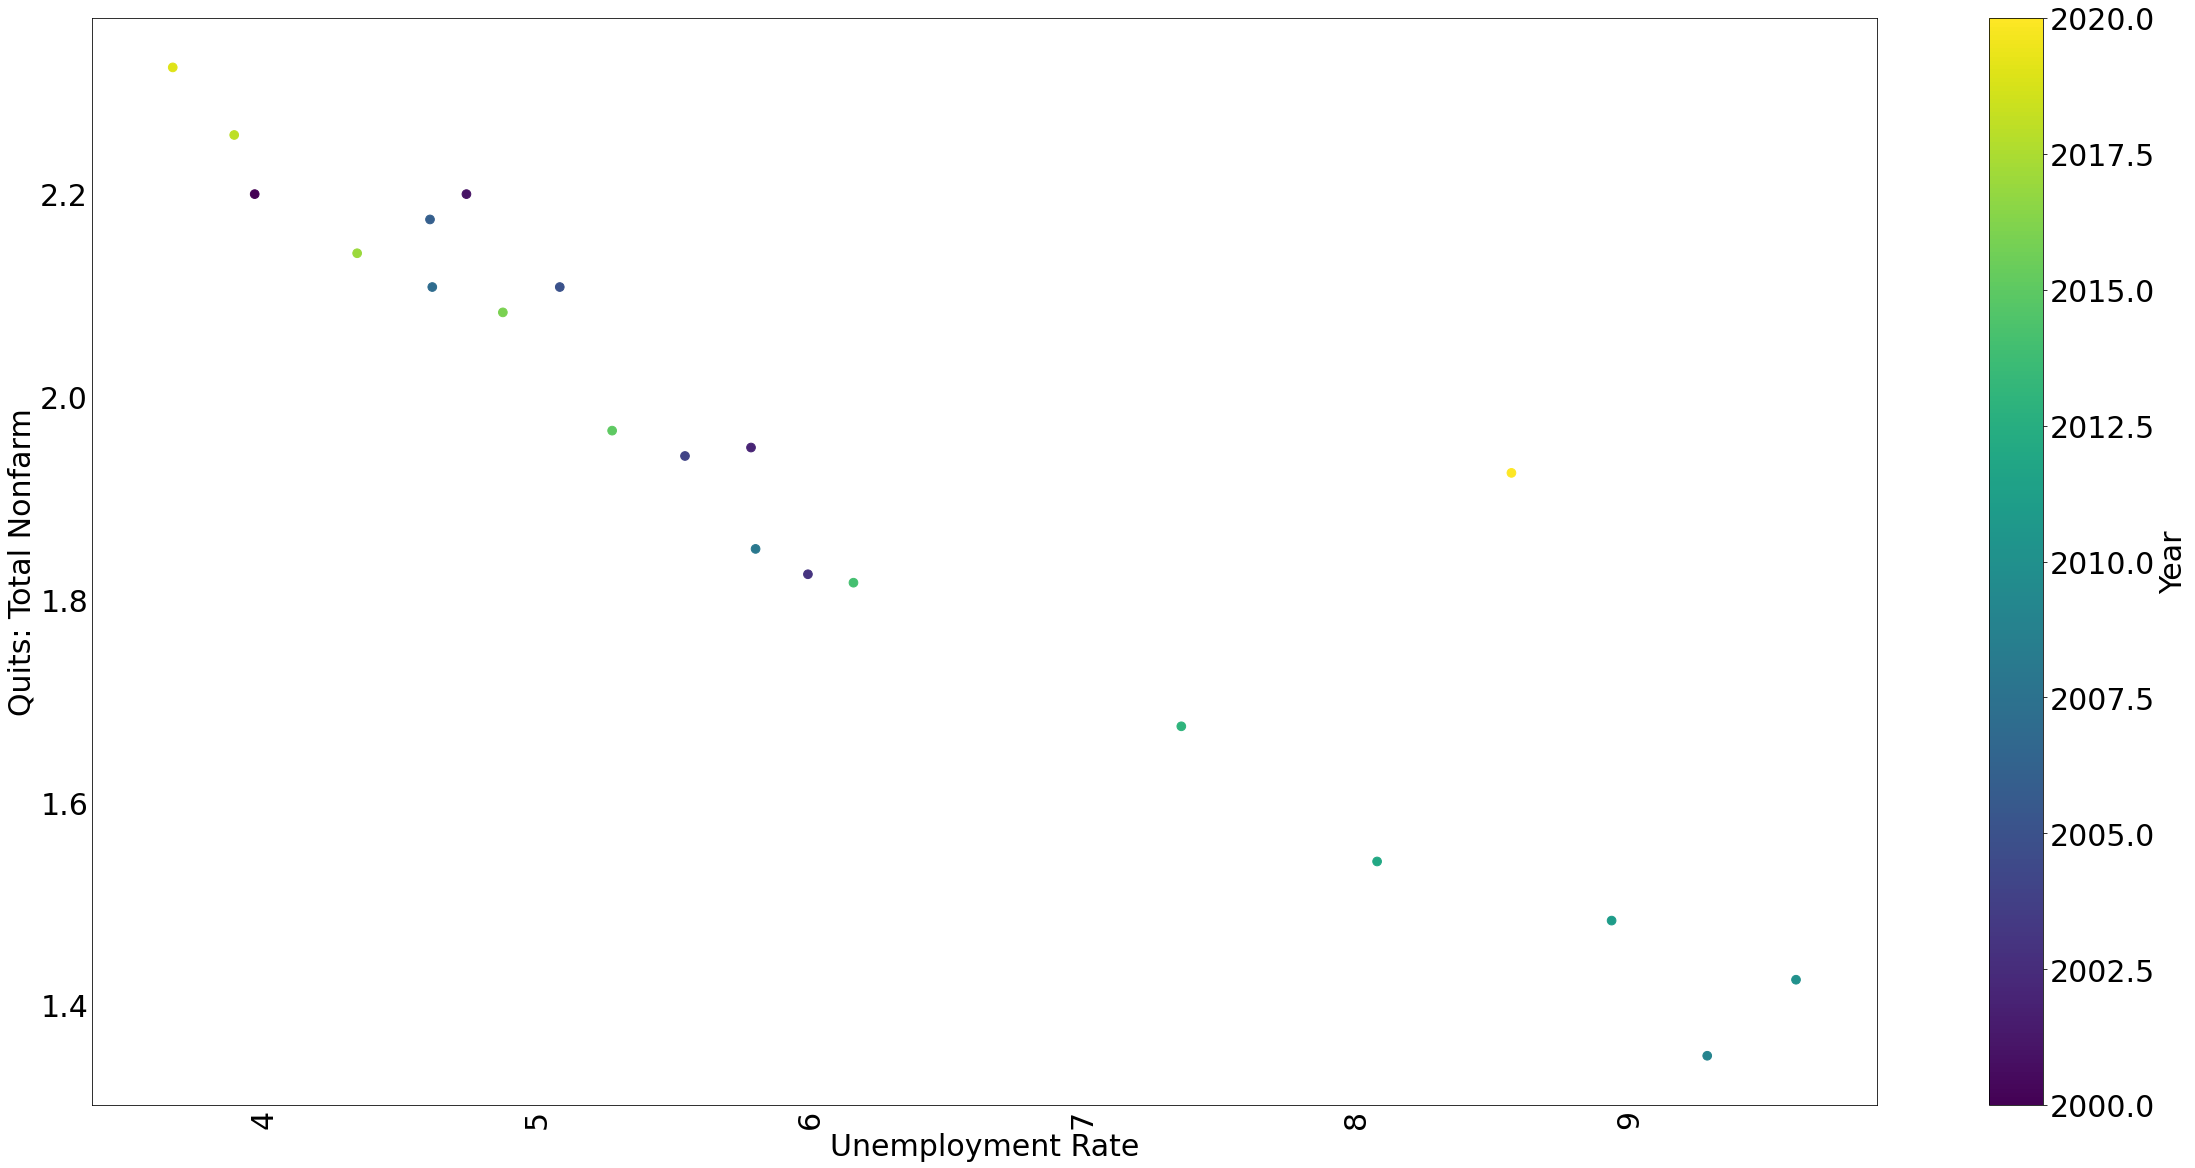

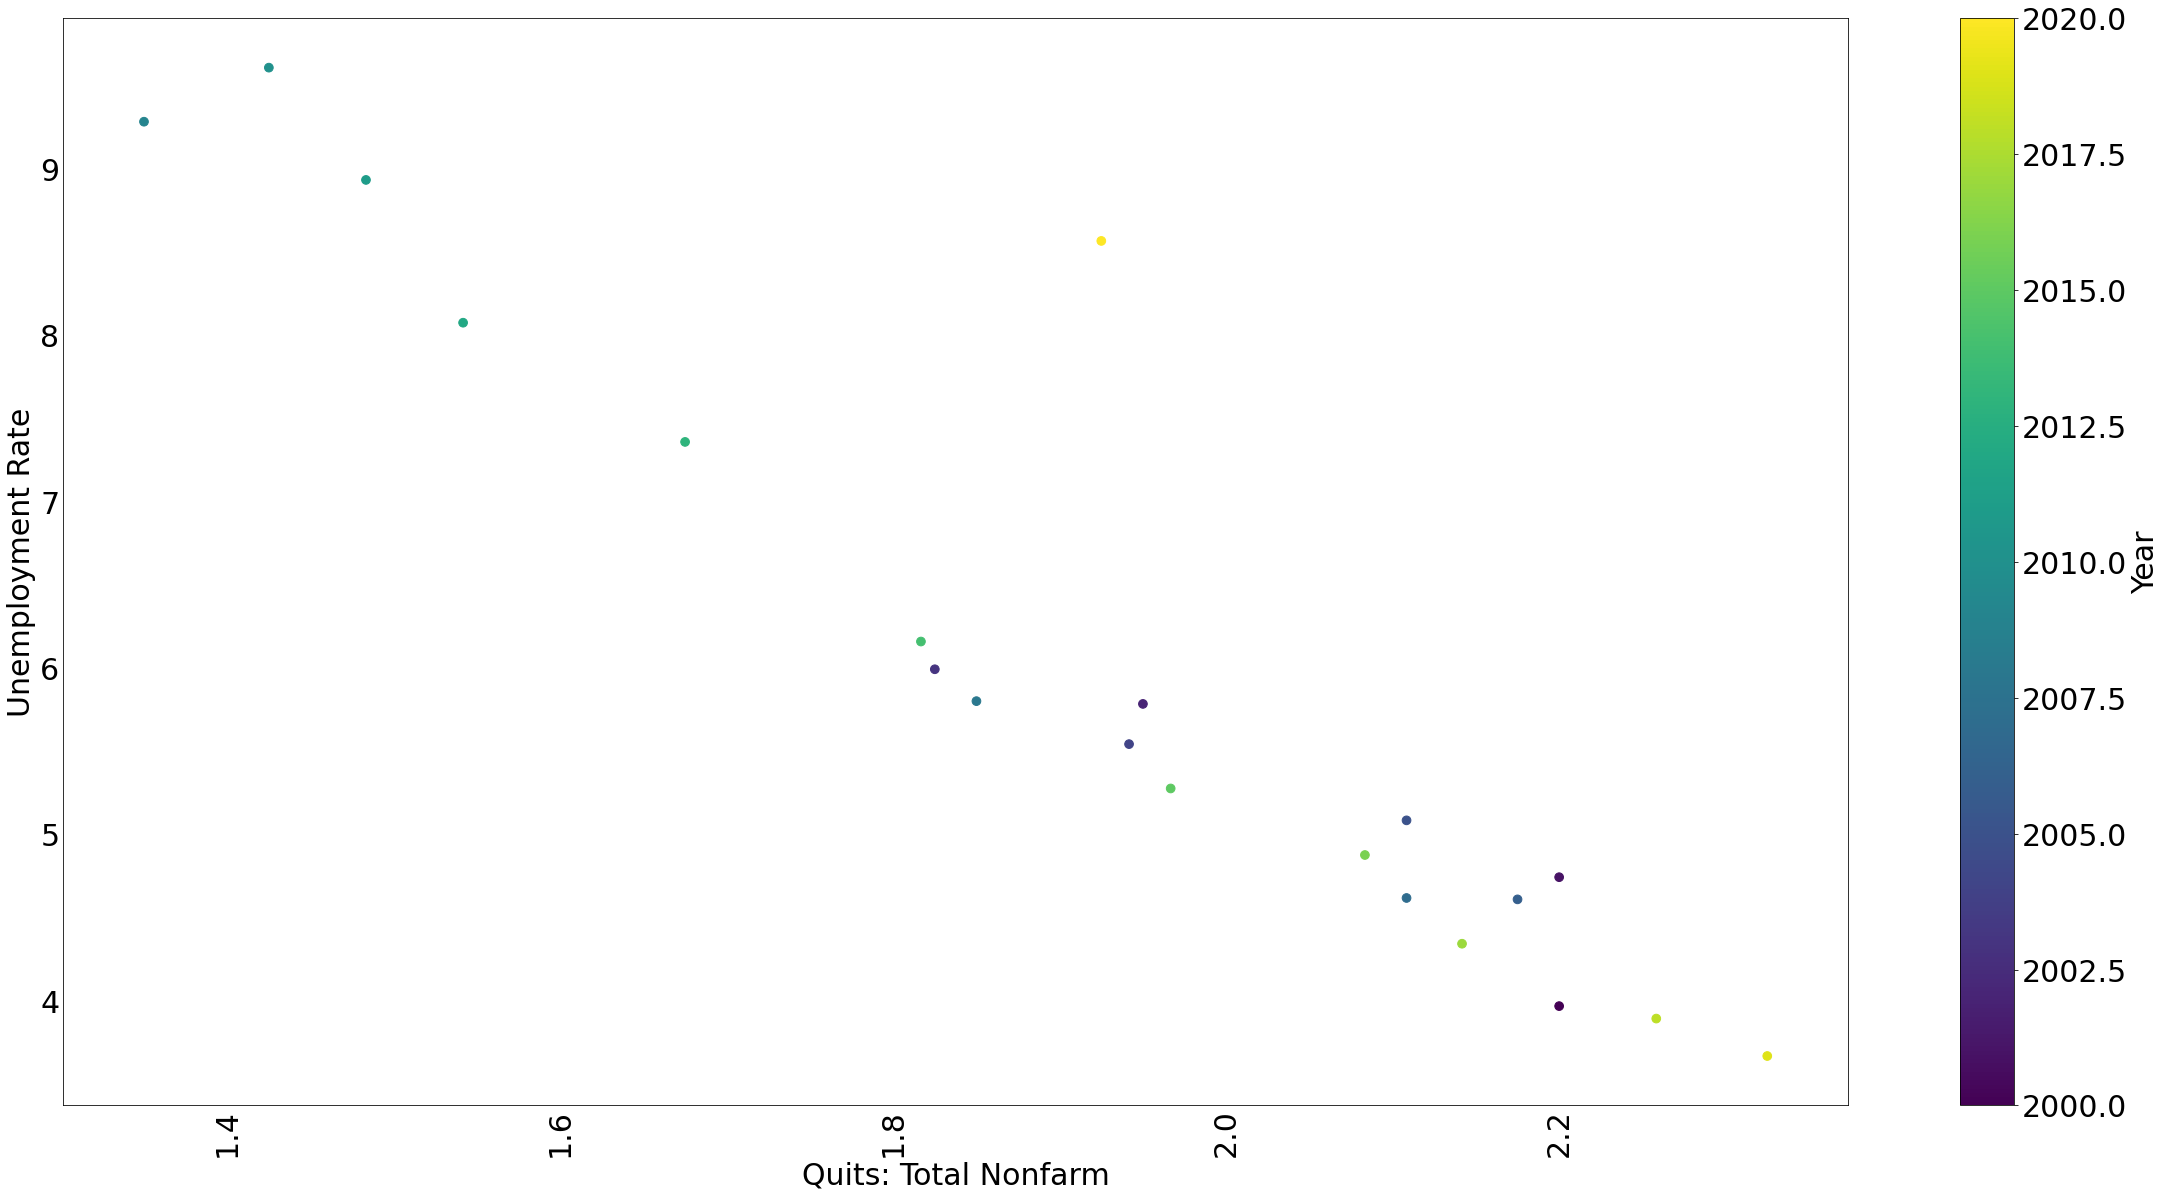

In [5]:
# plotting the data on a scatter plot diagram

plt.rcParams.update({"font.size": 30})
plot_ts_scatter(data, title = "Unempl Rate Vs Quits Rate", pp = None)

> From the above plot, we can see that people quite their jobs less when unemployment rates are high. This makes sense because with high unemployment rates, people tend to stick to the their jobs for fear of being unable to get another job.

Now, let's take a look at data for Job Openings and Labor Turnover (JOLTS) for the non-farm sector. Non-farm sector refers to workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed. This measure provides useful insights into the current economic situation because it can represent the number of jobs added or lost in an economy. Decreases in unemployment rate might indicate that businesses are hiring which might also suggest that businesses are growing. Additionally, those who are newly employed have increased their personal incomes, which means (all else constant) their disposable incomes have also increased, thus fostering further economic expansion.

In [6]:
data_codes = {"Unemployment Rate": "UNRATE",    
              "Job Openings:": "JTUJOR",
              "Hires:": "JTSHIR",
              "Total Separations": "JTSTSR",
              "Quits": "JTSQUR",
              "Layoffs and Discharges": "JTSLDR",
              "Other Separations": "JTUOSR"}

start = datetime.datetime(1900,12, 1)
end = datetime.datetime.today()

JOLTS = round(gather_data(data_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna(), 2)
JOLTS

,Unemployment Rate,Job Openings:,Hires:,Total Separations,Quits,Layoffs and Discharges,Other Separations
DATE,,,,,,,
2000-12-31,3.90,3.10,4.10,3.90,2.20,1.50,0.20
2001-03-31,4.23,3.67,4.17,4.20,2.37,1.57,0.27
2001-06-30,4.40,3.37,3.97,4.07,2.30,1.47,0.30
2001-09-30,4.83,3.17,3.93,4.03,2.17,1.57,0.33
2001-12-31,5.50,2.53,3.77,3.93,1.97,1.67,0.27
...,...,...,...,...,...,...,...
2019-09-30,3.63,4.63,3.93,3.77,2.33,1.23,0.20
2019-12-31,3.53,4.20,3.87,3.73,2.30,1.20,0.20
2020-03-31,3.83,4.13,3.70,5.73,2.13,3.30,0.23


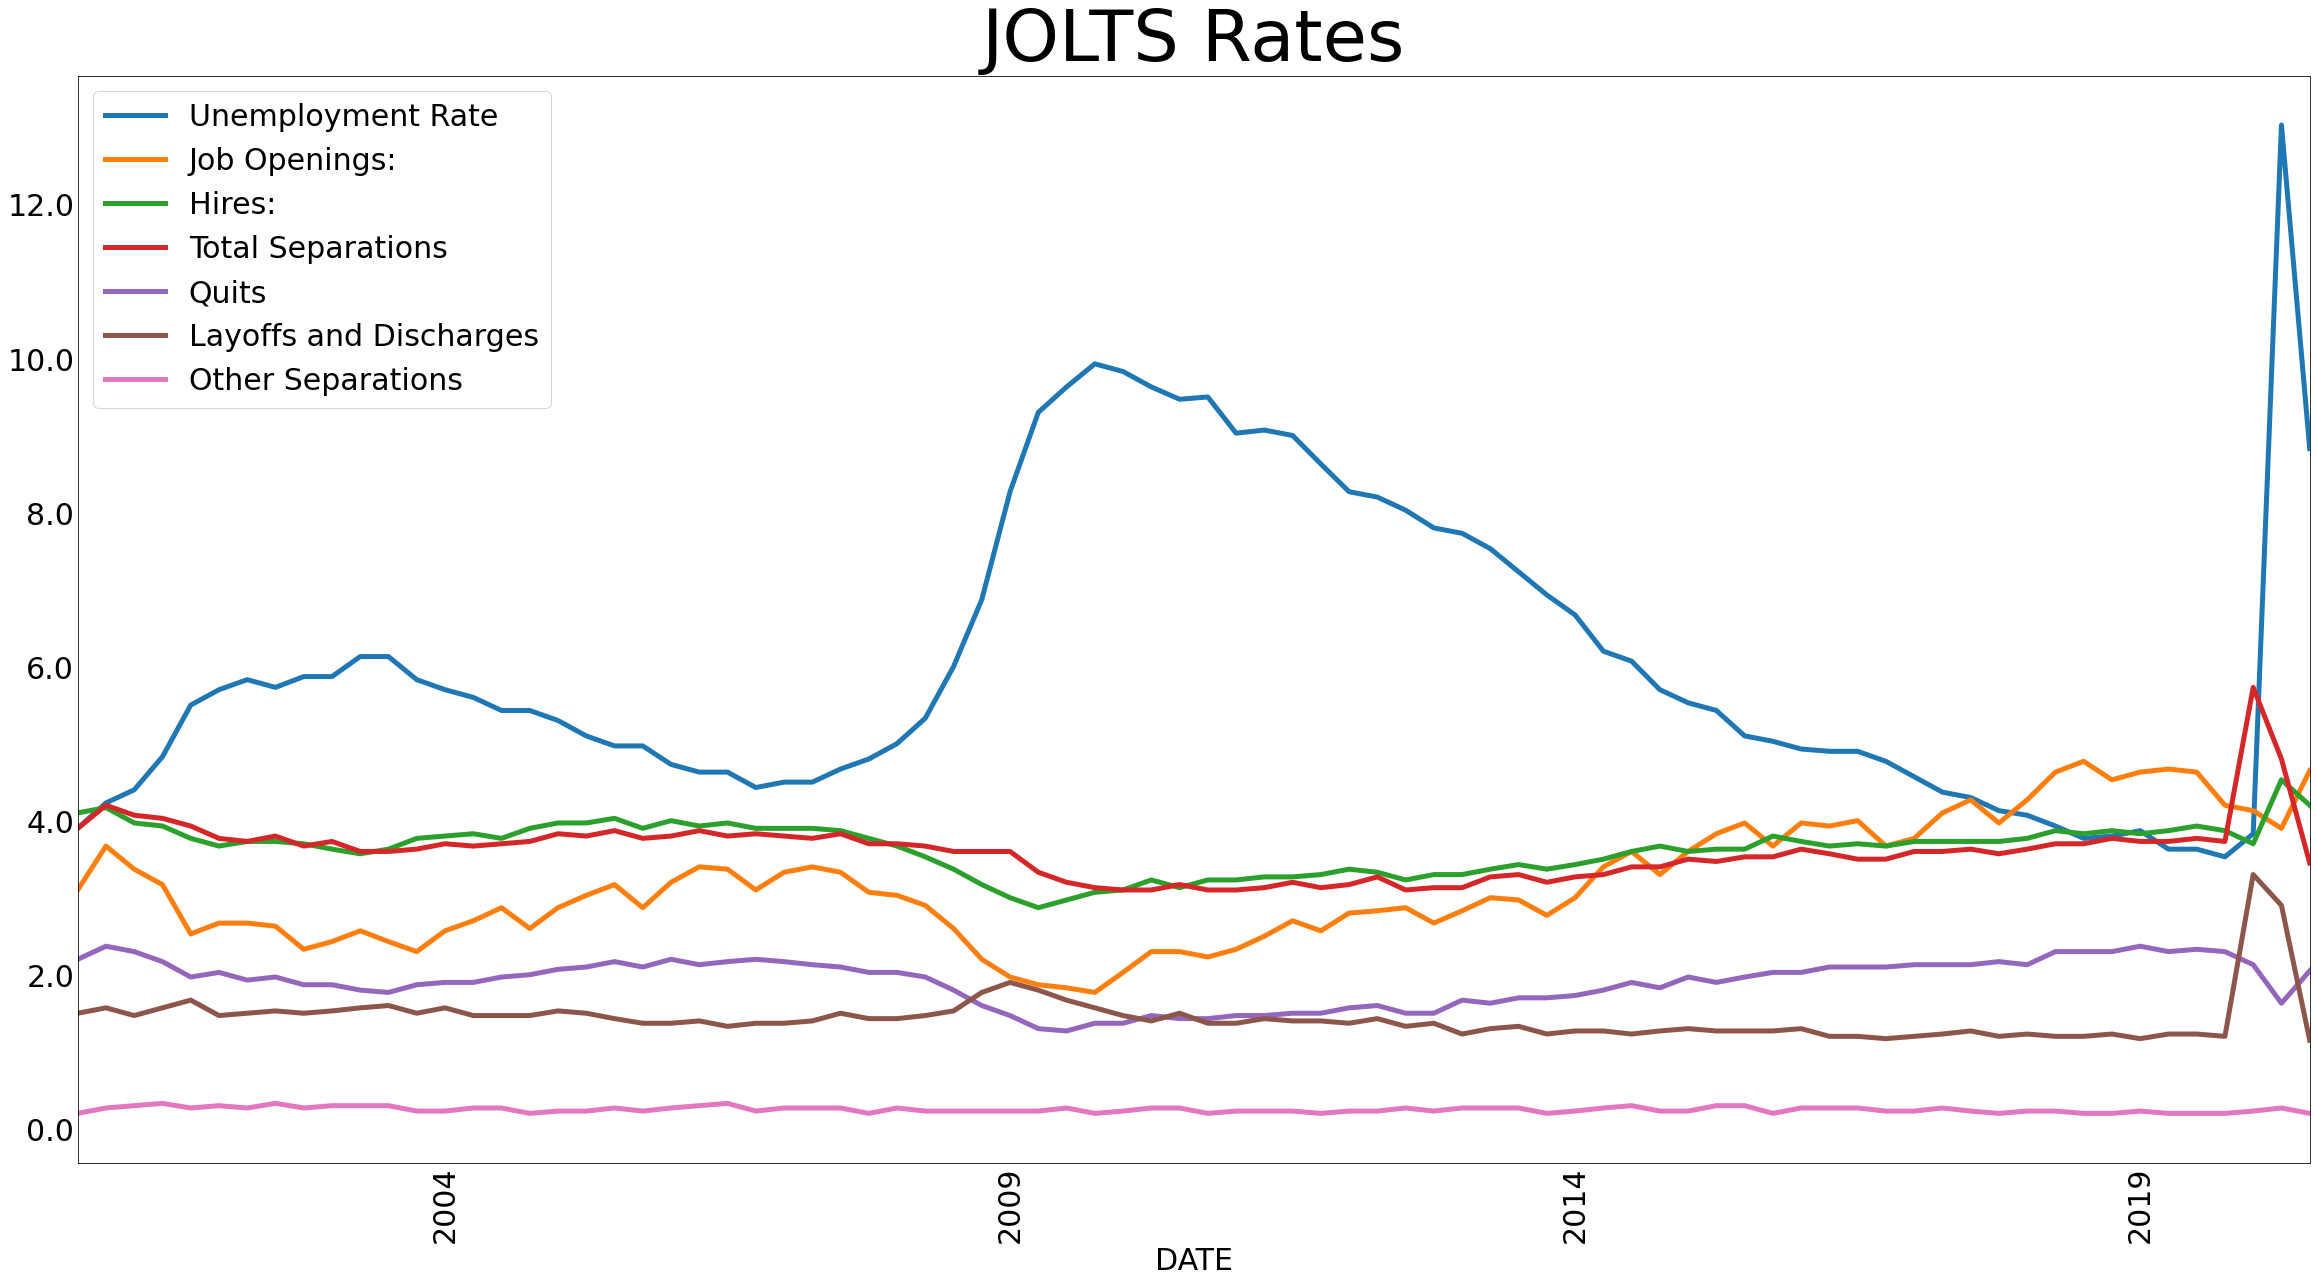

<Figure size 432x288 with 0 Axes>

In [7]:
plt.rcParams.update({"font.size": 30})
# we'll save this fig as well as other figs to a single pdf file so let's name it fig1
plot_lines(df = JOLTS, title = "JOLTS Rates", linewidth = 5, pp=None, legend = True)


> We see there's a sharp increase in unemployment rates between 2009/2010. This makes sense since this was the tail end of the Great Recession of 2007/2009. The rate of hires and quites is also lowest at this point. We also see a sharp peak on the rate Layoffs and discharges curve.  

> We go over to 2020 and this cycle repeats itself. Unemployment rate is at record high, much higher than that of the Great recession. Total separations is also at record high as most people lost their jobs due to the impacts of COVID-19 pandemic. We see that there's a sharp increase in Layoffs and Discharges which obviously affected the total rate of separations. We also see a sharp decrease in the rate at which people quit their jobs. Again, there's a record high unemployment, so people are less willing to lose their jobs, hence we see a declien in quits. 

> We go over to 2019 when rate of unemployment is at it's lowest since the year 2000 and we see that the rate of layoffs and discharges is also at it's lowest. The rate at which people quite their jobs is also much higher than those of 2009 and 2020 when unemployment rates is at it's peak. 

Total separations include quits, layoffs and discharges and other separations. We can plot a stacked graph to illustrate how these individual factors affect total rate of separations. Since the cycle of 2009/2010 is repeated in 2020, it's plausible to say that rate of unemployment affects the rate at which people stay at their jobs.

2. Create a correlation matrix plot for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

In [8]:
# gather data
GDP_codes = {"Gross Domestic Product": "GDP",
             "Real Gross Domestic Product": "GDPC1",
             "Gross Domestic Product: Implicit Price Deflator": "GDPDEF",
             "Currency in Circulation": "CURRCIR"}

start = datetime.datetime(1917,12, 1)
end = datetime.datetime.today()

GDP_var = gather_data(GDP_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna()

GDP_var

,Gross Domestic Product,Real Gross Domestic Product,Gross Domestic Product: Implicit Price Deflator,Currency in Circulation
DATE,,,,
1947-03-31,243.164,2033.061,11.960,28.372000
1947-06-30,245.968,2027.639,12.131,28.193000
1947-09-30,249.585,2023.452,12.335,28.388333
1947-12-31,259.745,2055.103,12.639,28.727667
1948-03-31,265.742,2086.017,12.739,28.143667
...,...,...,...,...
2019-06-30,21329.877,19020.599,112.141,1732.132333
2019-09-30,21540.325,19141.744,112.531,1752.891667
2019-12-31,21747.394,19253.959,112.950,1783.115333


In [9]:
# calculate year over year % change of each variable
GDP_var["GDP %"] = GDP_var["Gross Domestic Product"].pct_change(4)*100
GDP_var["GDPC1 %"] = GDP_var["Real Gross Domestic Product"].pct_change(4)*100
GDP_var["GDPDEF %"] = GDP_var["Gross Domestic Product: Implicit Price Deflator"].pct_change(4)*100
GDP_var["CURRCIR %"] = GDP_var["Currency in Circulation"].pct_change(4)*100

change_vars =["GDP %",
             "GDPC1 %",
             "GDPDEF %",
             "CURRCIR %"] 

change = round(GDP_var[change_vars], 2).dropna()
change

,GDP %,GDPC1 %,GDPDEF %,CURRCIR %
DATE,,,,
1948-03-31,9.29,2.60,6.51,-0.80
1948-06-30,10.81,4.58,5.96,-1.44
1948-09-30,11.86,5.39,6.14,-1.27
1948-12-31,7.94,3.89,3.90,-1.50
1949-03-31,3.50,0.94,2.54,-1.81
...,...,...,...,...
2019-06-30,3.78,1.96,1.78,4.93
2019-09-30,3.85,2.08,1.73,4.63
2019-12-31,4.01,2.34,1.63,4.92


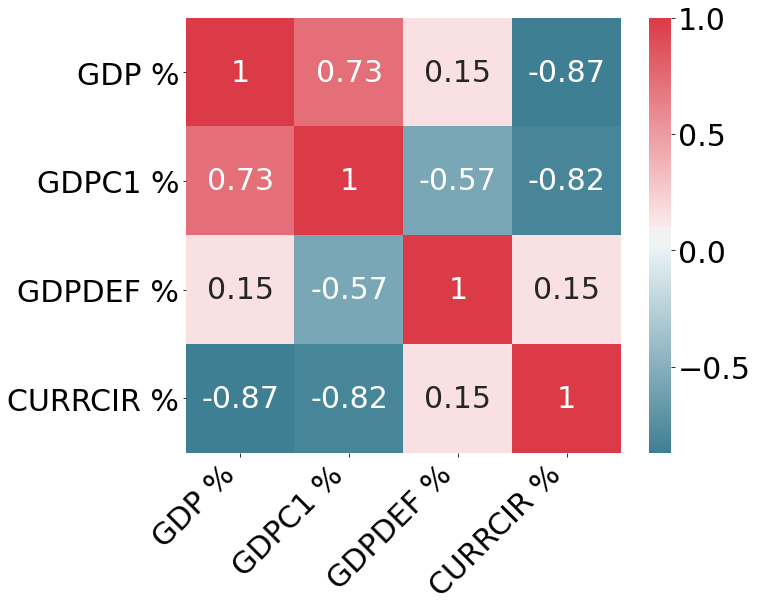

AttributeError: 'NoneType' object has no attribute 'savefig'

In [14]:
# now let's plot a correlation matrix of change_vars
def corr_heatmap (data, pp):
    fig, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sn.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), 
                     cmap=sn.diverging_palette(220, 10, as_cmap=True),
                     square=True, ax = ax)
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation = 45,
                       horizontalalignment = "right")
    plt.show()  
    pp.savefig(fig, bbox_inches = "tight")  
    plt.close() 
    
data = round(change.corr(), 2)
corr_heatmap(data, pp=None)
plt.title("Correlation", fontsize = 38)


# testing1    
#corr = change.corr()
#f, ax = plt.subplots(figsize=(10, 8))
#sn.heatmap(df.corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), 
#           cmap=sn.diverging_palette(220, 10, as_cmap=True),
#           square=True, ax=ax)    

#testing2
#    corr = change.corr()
# create a df for the columns we want to use to create the correlation matrix
#data_df = pd.DataFrame(data, columns =["GDP %","GDPC1 %", "GDPDEF %","CURRCIR %"])
#corrM = data_df.corr()

#sn.heatmap(corr, annot=True)

#plt.show()
#plt.close()

We can see from the correlation matrix that change in the price level or CPI has a somewhat strong positive correlation with a change in the GDP and a negative correlation with the real GDP.

3. Download data for 1 Year, 2 Year, 5 Year, 10 Year, and 30 Year U.S. Treasuries (Constant Maturity Rates). Create a function that creates a yield for each date. 

> The yield curve is a plot that indicates the change in rate of interest given an increase in maturity. In this case, the horizontal axis would stretch from 1 to 30, with the relevant rate plotted for each maturity. 

Create a plot for every date and save each plot with the date marked in a single pdf.


4. Plot all of the variables from (3) in a single time series line plot. Indicate using shaded regions where the 5 Year rate is less than the 1 year rate. Save this plot in the same pdf that you used in (3).

In [15]:
# gather data
t_codes = {"1 Y (%)": "DGS1",
                "2 Y (%)": "DGS2",
                "5 Y (%)": "DGS5",
                "10 Y (%)": "DGS10",
                "30 Y (%)": "DGS30"}

start = datetime.datetime(1940, 2, 28)
end = datetime.datetime.today()

t_var = round(gather_data(t_codes,
                  start = start,
                  end = end,
                  freq = "M").dropna(), 2)
t_var

,1 Y (%),2 Y (%),5 Y (%),10 Y (%),30 Y (%)
DATE,,,,,
1977-02-28,5.47,6.09,6.83,7.39,7.75
1977-03-31,5.50,6.09,6.93,7.46,7.80
1977-04-30,5.44,5.96,6.79,7.37,7.73
1977-05-31,5.84,6.25,6.94,7.46,7.80
1977-06-30,5.80,6.13,6.76,7.28,7.64
...,...,...,...,...,...
2020-06-30,0.18,0.18,0.34,0.73,1.49
2020-07-31,0.15,0.15,0.28,0.62,1.31
2020-08-31,0.13,0.14,0.27,0.65,1.36


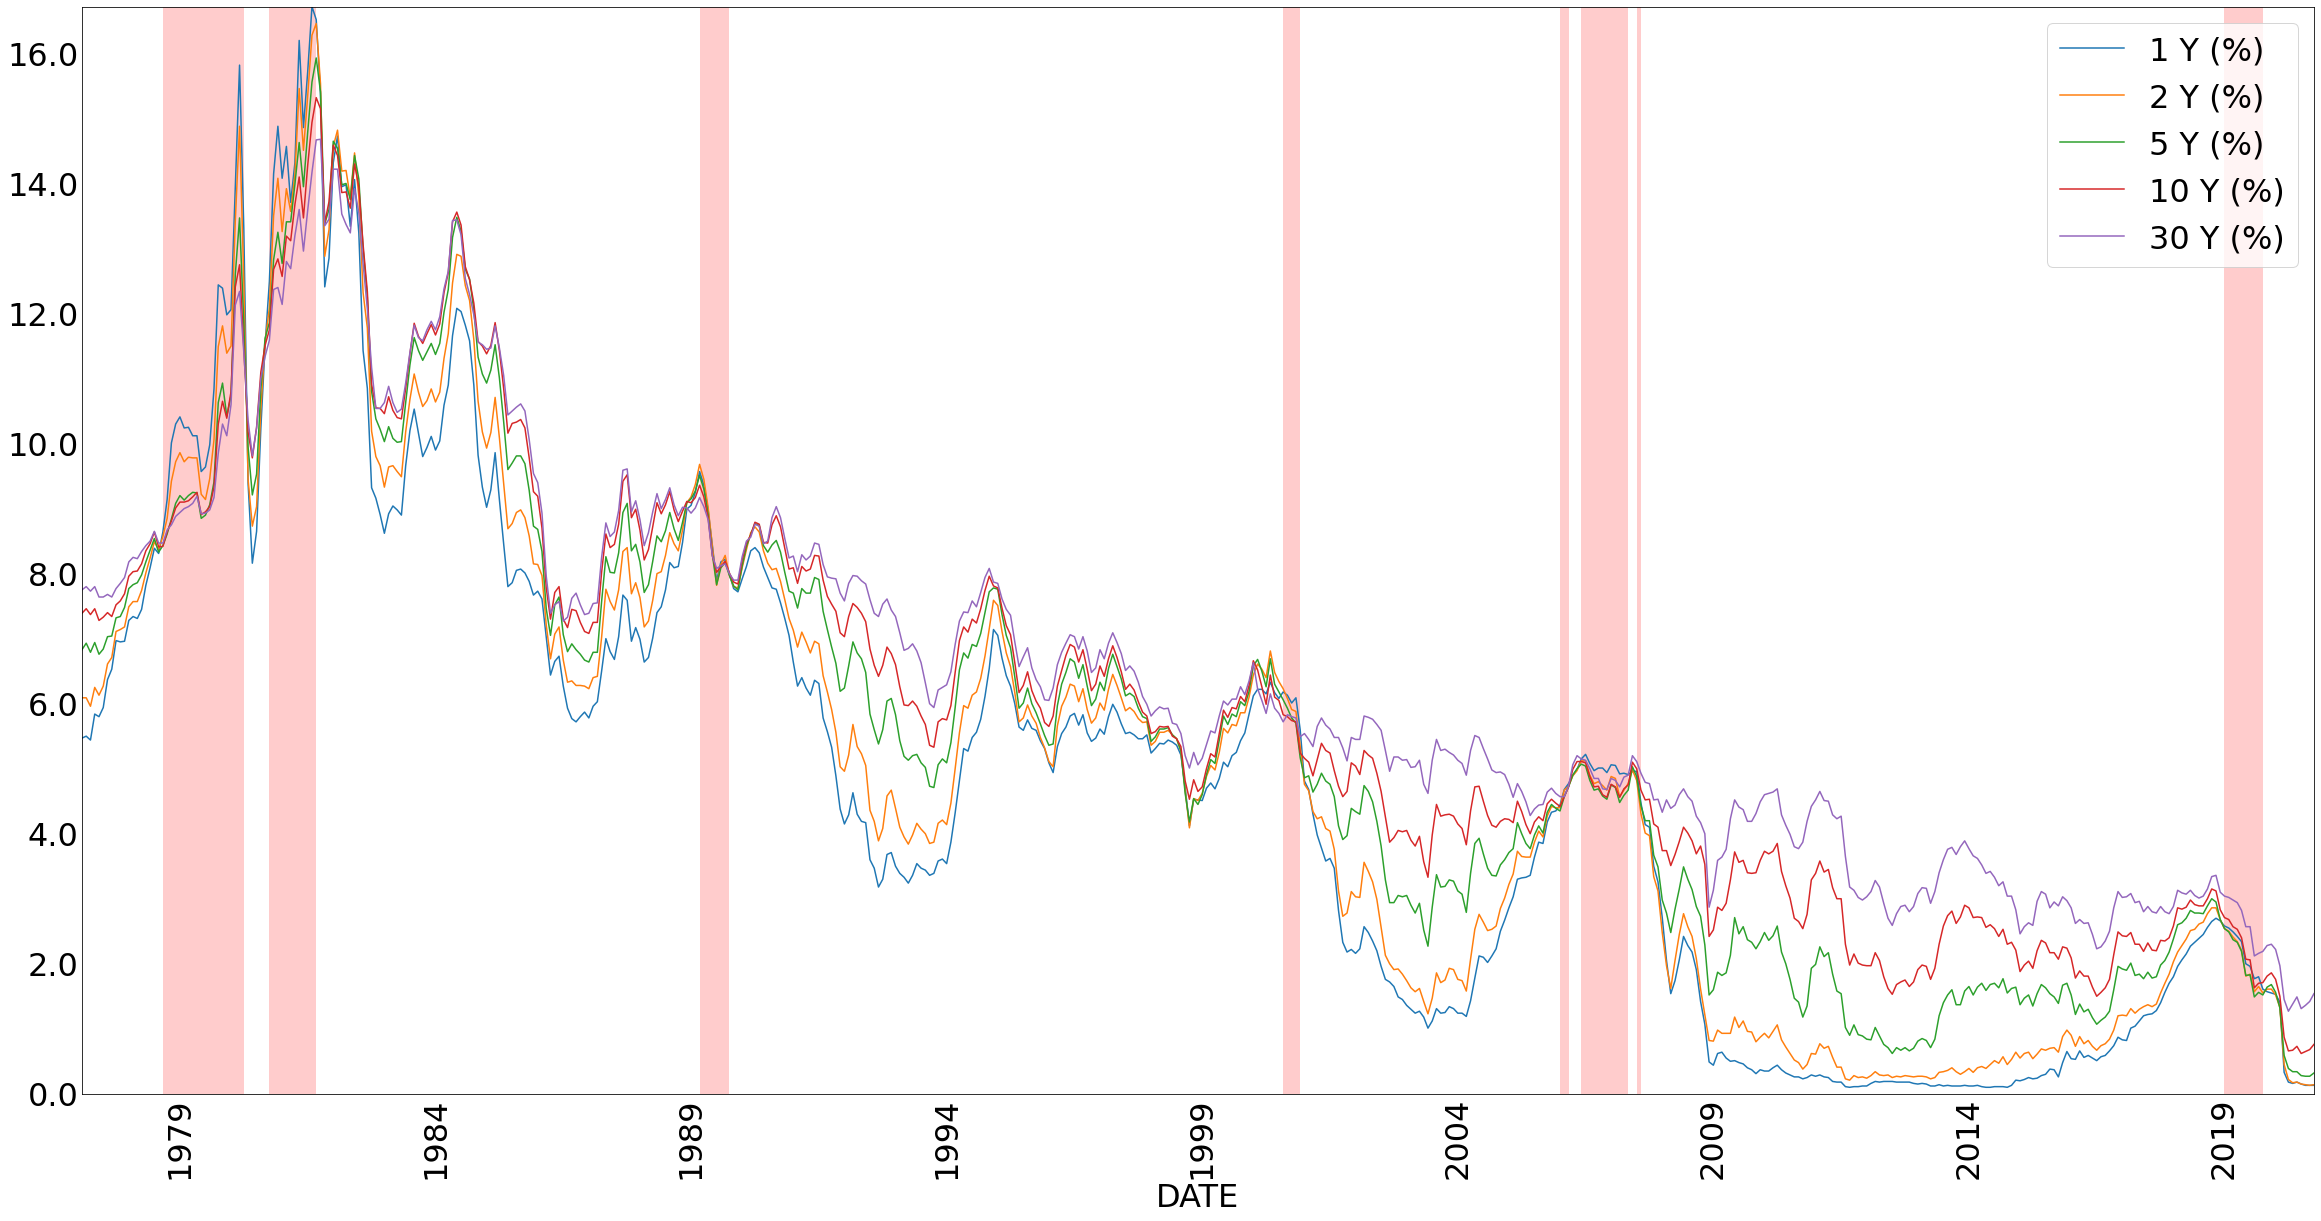

<Figure size 432x288 with 0 Axes>

In [16]:
plt.rcParams.update({"font.size": 32})
plt.rcParams["axes.ymargin"] = 0

plot_lines(df = t_var, linewidth =1.5, figsize =(40, 20), pp =None, show_inversion = True)


The regions shaded with pink are regions where the 1 year rate of maturity is greater than the 5-year rate. 

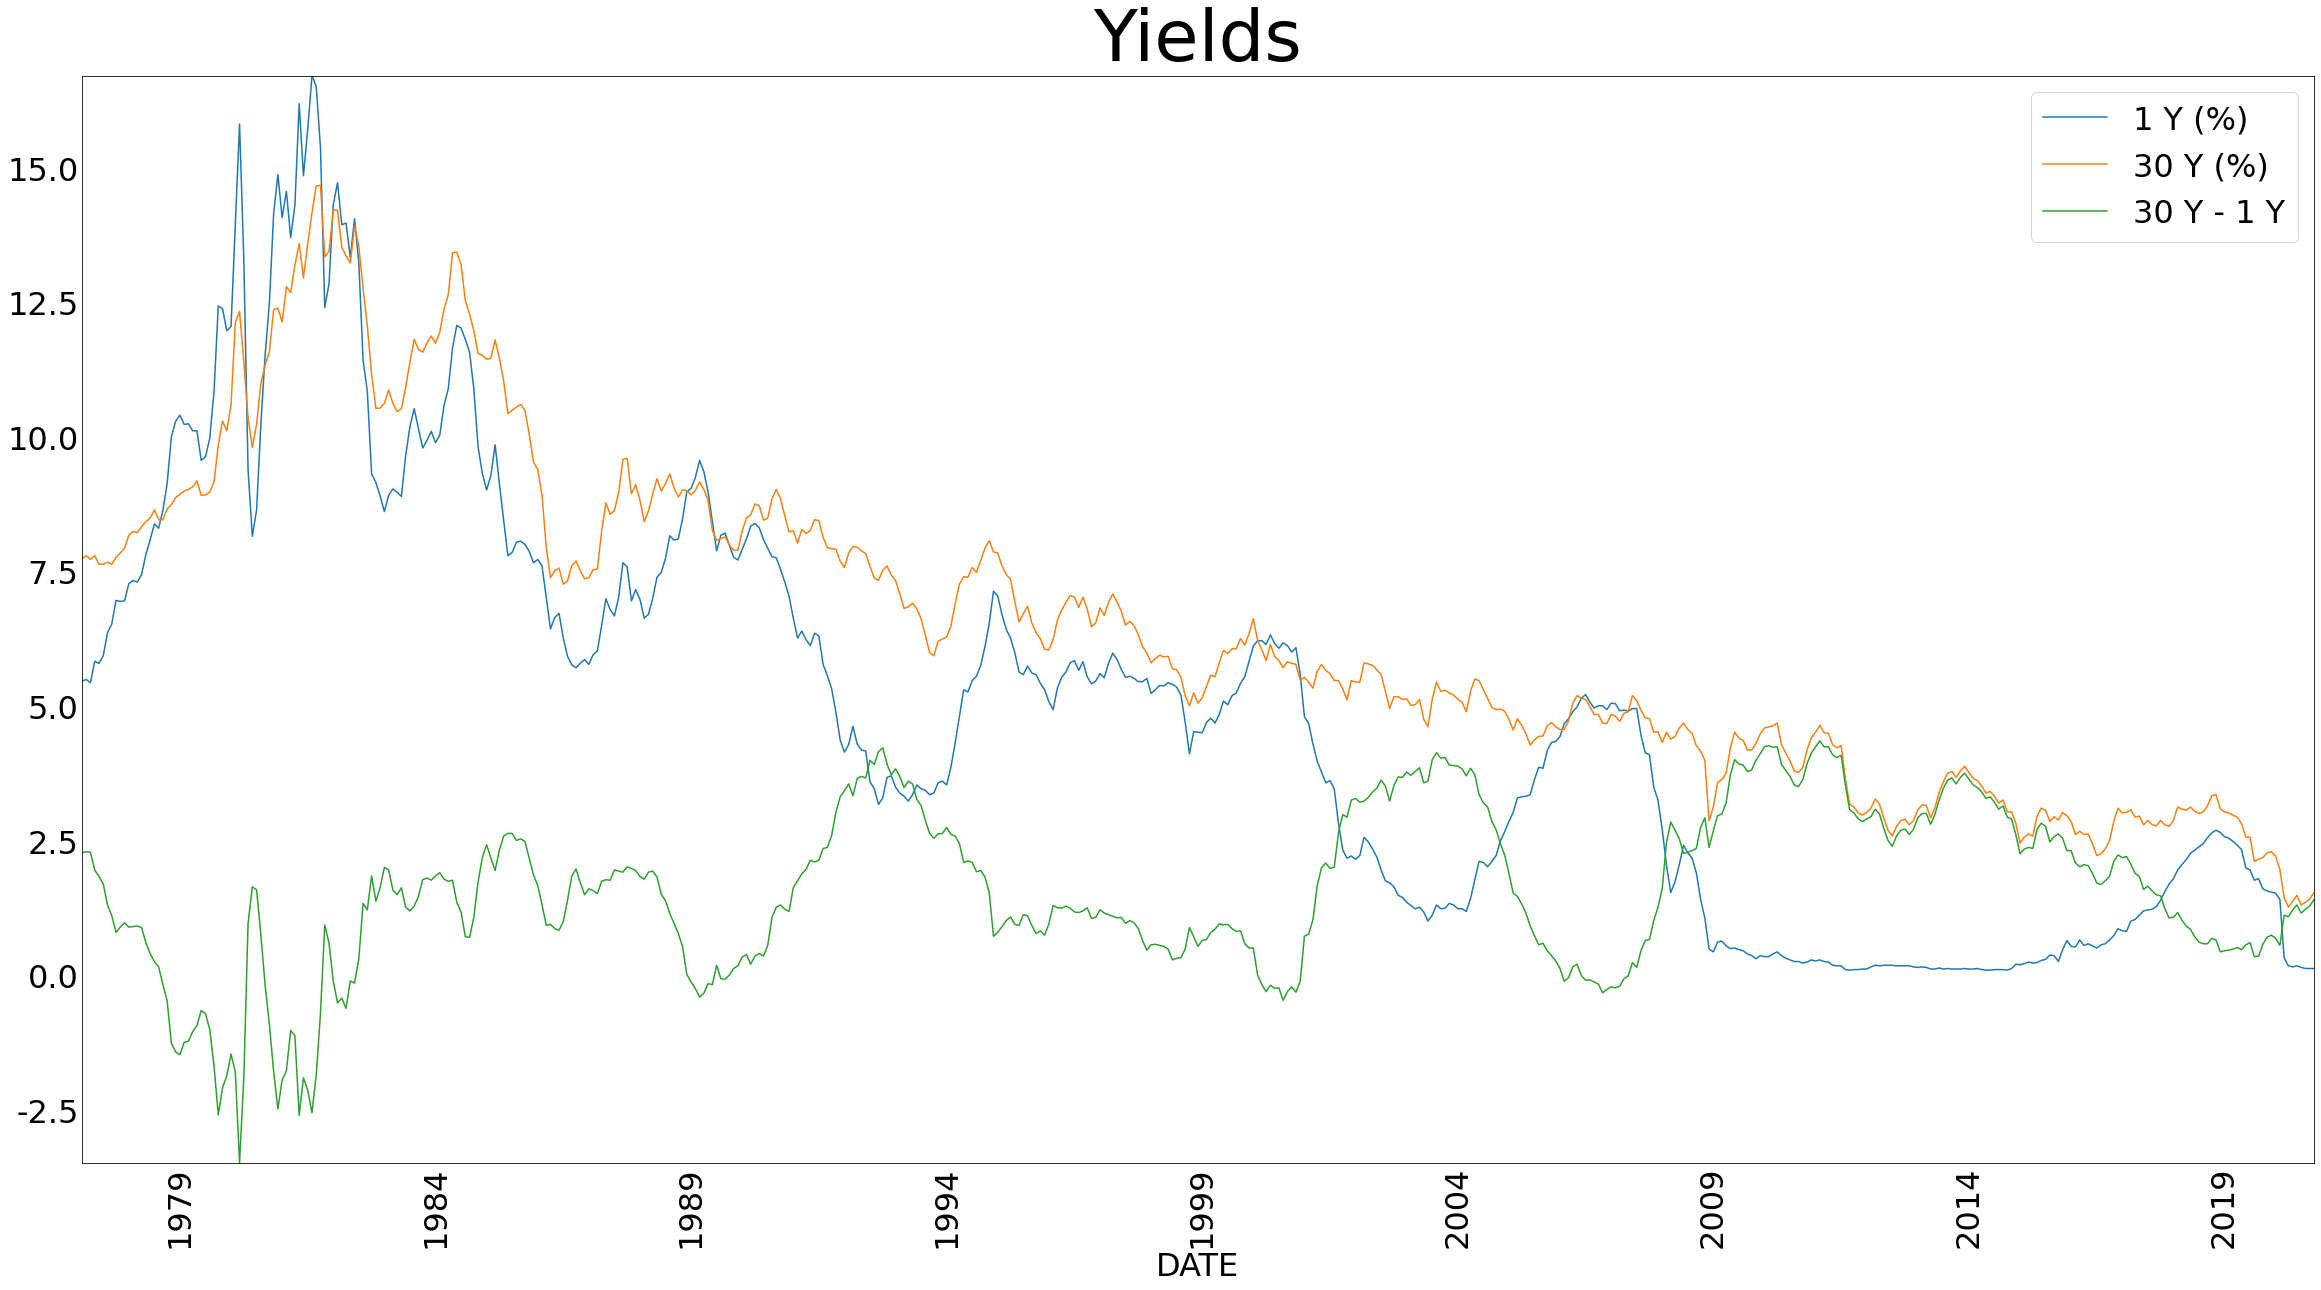

<Figure size 432x288 with 0 Axes>

In [17]:
t_var["30 Y - 1 Y"] = t_var["30 Y (%)"].add(-1 * t_var["1 Y (%)"])
plot_lines(df = t_var[["1 Y (%)", "30 Y (%)", "30 Y - 1 Y"]],
          title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)
plt.show()
plt.close()

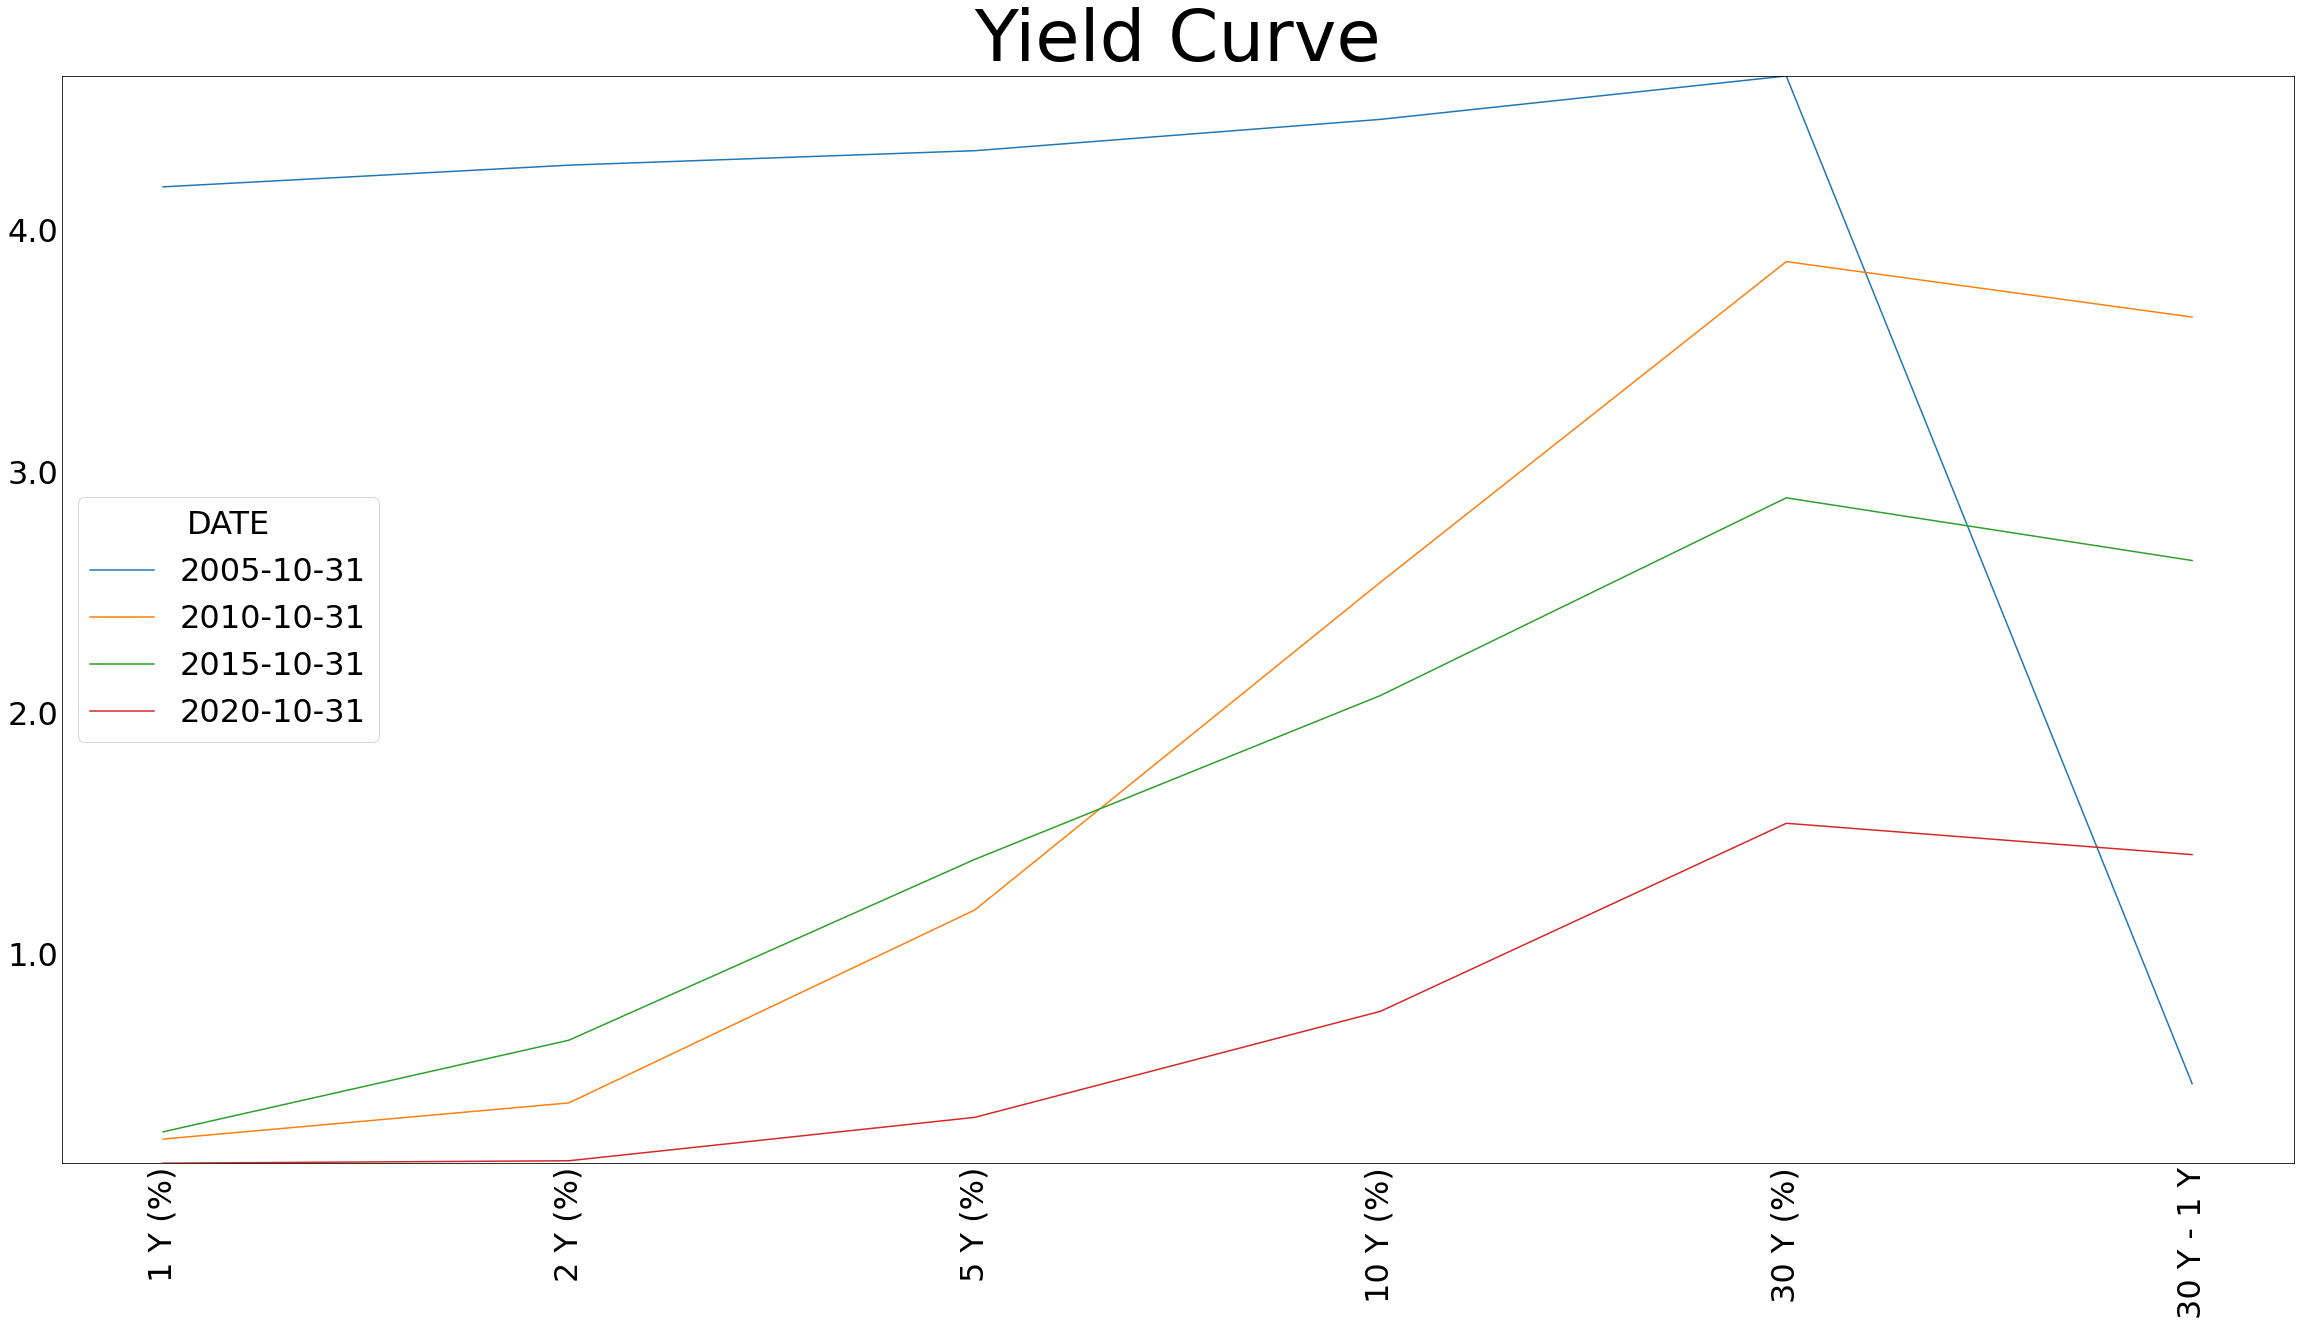

<Figure size 432x288 with 0 Axes>

In [18]:
T_data = t_var.T
T_data.rename(columns={name : str(name)[:10] for name in T_data.keys()}, inplace = True)
keys = list(T_data.keys())
T_data_trunc = T_data[keys[-181::60]]
max_y = T_data.max().max()
#for key, val in T_data_trunc.items():
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, figsize = (40, 20), 
           full_index = True, pp = None)


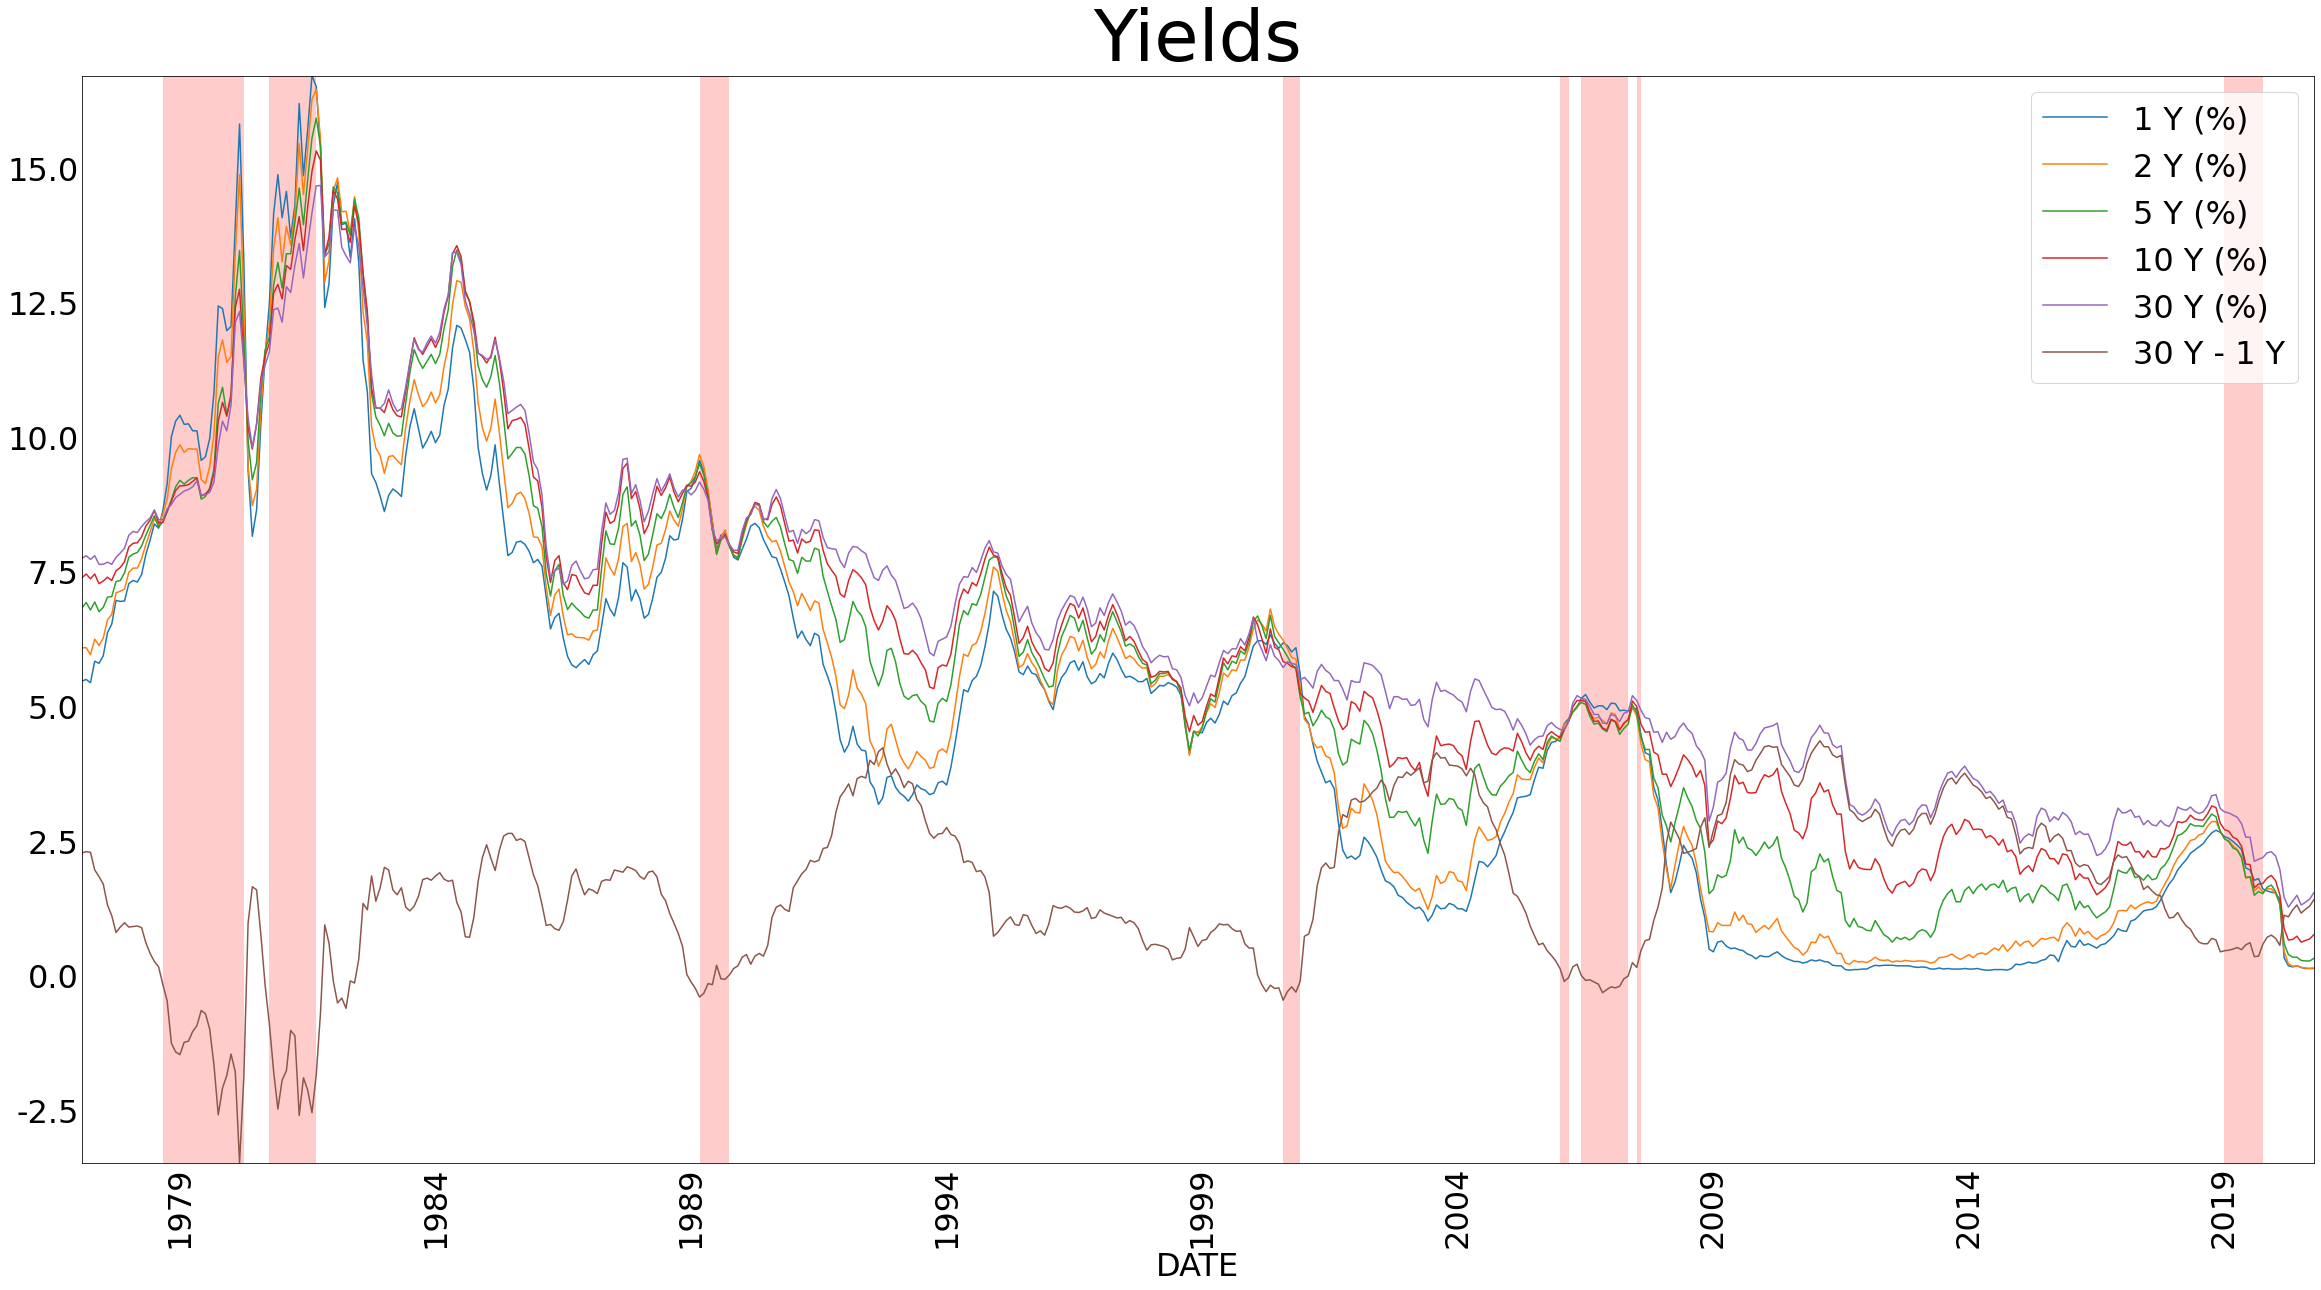

<Figure size 432x288 with 0 Axes>

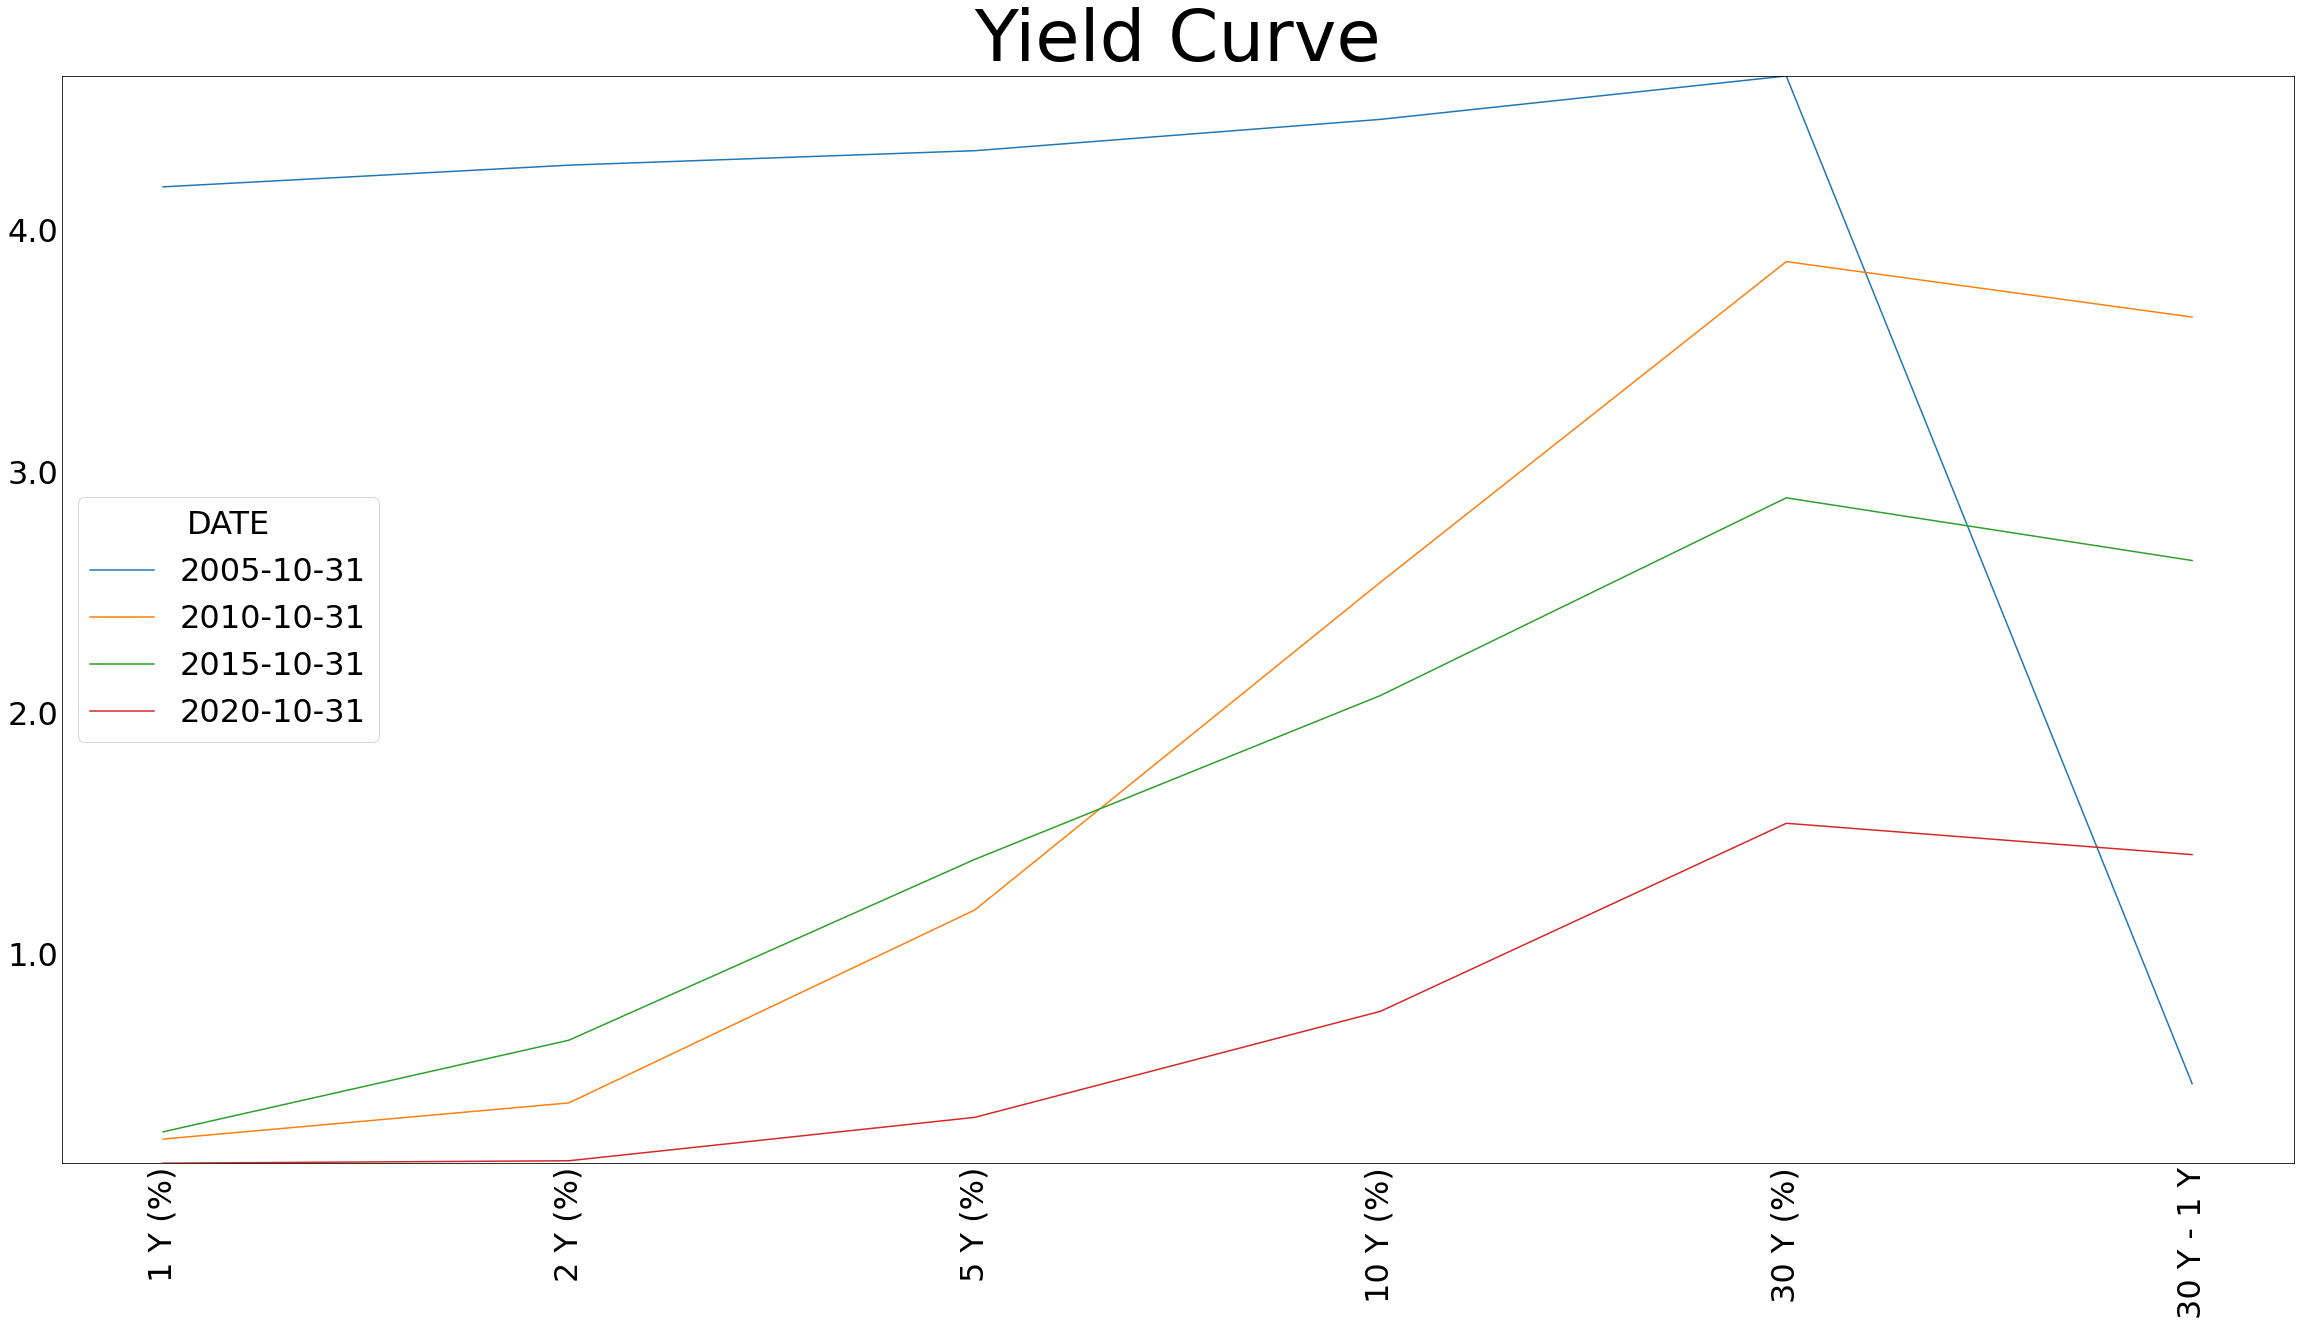

<Figure size 432x288 with 0 Axes>

In [19]:
# plotting both graphs in a single pdf file
pp=PdfPages("Yield_Curves.pdf")

plot_lines(df = t_var, title = "Yields", linewidth =1.5, figsize =(40, 20), pp =pp, show_inversion = True)

# yield curve
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, figsize = (40, 20), 
           full_index = True, pp = pp)

pp.close()


In [20]:
# create animation for yearly yields 
from matplotlib.animation import FuncAnimation
import math 
import ffmpeg

def plot_curves(date, *kwargs):
    #ax.clear()
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])
 
    # the FuncAnimation cycles from 0 to i frames,
    plot_df = df[date]
    alpha = 1 if date in write_dates else .1
    color = "C" + str(math.ceil(int(date[5:7])/3)) if date != write_dates[0] else "k"

    # If no secondary_y (axis), plot all variables at once

    plot_df.plot.line(linewidth = linewidth, ax = ax, alpha = alpha, color = color)
    if date in write_dates: 
        plt.text(len(plot_df.keys()) - 1, plot_df["30 Y (%)"], date[5:], color = color)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(str(date)[:10] + "\n" + "Yield Curve (U.S. Treasuries)", fontsize = 30)
    print(date)
    
def init(*kwargs):
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    plt.xticks([i for i in range(len(data.index))], list(data.index))
    ax.tick_params(axis='x', rotation=90)
    # transform y-axis values from sci notation to integers
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])


In [21]:

dates = list(T_data.keys())[-166:]
write_dates = dates[-1:0:-20]
df = T_data[dates]
#.drop("10 Y (%) - 1 Y (%)", axis = 0)
max_y = df.max().max()
fig, ax = plt.subplots(figsize=(40,20))   
plt.rcParams.update({"font.size": 30})
linewidth = 5
# the functions will unpack the tuple. The same names variable names
# are used in the function
kwargs = (df, fig, ax, max_y, linewidth, write_dates)
frames = dates
anim = FuncAnimation(fig, plot_curves, frames = frames, 
                     blit = False, init_func = init, interval=100, 
                     fargs =kwargs)
# Use the next line to save the video as an MP4.
# pip install ffmpeg-python
#anim.save("2020USTreasuryYieldCurve.mp4", writer = "ffmpeg")
anim.save("2020USTreasuryYieldCurve.gif", writer = "pillow", fps=2)
plt.close()

2007-01-31
2007-02-28
2007-03-31
2007-04-30
2007-05-31
2007-06-30
2007-07-31
2007-08-31
2007-09-30
2007-10-31
2007-11-30
2007-12-31
2008-01-31
2008-02-29
2008-03-31
2008-04-30
2008-05-31
2008-06-30
2008-07-31
2008-08-31
2008-09-30
2008-10-31
2008-11-30
2008-12-31
2009-01-31
2009-02-28
2009-03-31
2009-04-30
2009-05-31
2009-06-30
2009-07-31
2009-08-31
2009-09-30
2009-10-31
2009-11-30
2009-12-31
2010-01-31
2010-02-28
2010-03-31
2010-04-30
2010-05-31
2010-06-30
2010-07-31
2010-08-31
2010-09-30
2010-10-31
2010-11-30
2010-12-31
2011-01-31
2011-02-28
2011-03-31
2011-04-30
2011-05-31
2011-06-30
2011-07-31
2011-08-31
2011-09-30
2011-10-31
2011-11-30
2011-12-31
2012-01-31
2012-02-29
2012-03-31
2012-04-30
2012-05-31
2012-06-30
2012-07-31
2012-08-31
2012-09-30
2012-10-31
2012-11-30
2012-12-31
2013-01-31
2013-02-28
2013-03-31
2013-04-30
2013-05-31
2013-06-30
2013-07-31
2013-08-31
2013-09-30
2013-10-31
2013-11-30
2013-12-31
2014-01-31
2014-02-28
2014-03-31
2014-04-30
2014-05-31
2014-06-30
2014-07-31